In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/gibsonjackson/FODS-Assignment-2/main/Train.csv')
target = df['Appliances']
train=df.drop(columns='Appliances')
m=len(train)

train = (train-train.mean())/(train.std())

In [ ]:
import pandas as pd
import numpy as np
dft = pd.read_csv('https://raw.githubusercontent.com/gibsonjackson/FODS-Assignment-2/main/Test%20(1).csv')
testtarget = dft['Appliances']
testtrain=dft.drop(columns='Appliances')
m=len(testtrain)

testtrain = (testtrain-testtrain.mean())/(testtrain.std())

In [ ]:
train.shape 

(6316, 26)

In [ ]:
target.shape

(6316,)

In [ ]:
train.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.558269,-0.908886,-1.053940,-0.471249,-0.340829,-1.251785,-0.529426,-1.147968,-0.442995,1.330007,...,-0.090325,-0.818386,-0.333029,0.862752,-0.089927,-0.490918,-0.876211,-0.370140,-0.389074,-0.389074
1,0.187255,-0.069643,0.824607,-0.514343,0.046245,-0.280861,0.300104,-0.093362,0.409024,0.364176,...,0.627939,0.015921,0.631154,-0.375544,-1.423832,1.543760,0.138755,-0.212277,-1.665812,-1.665812
2,-1.537925,1.168722,-0.785577,0.593906,-1.423657,1.450227,-0.637766,1.040894,-1.023433,0.207574,...,-1.281992,0.650284,-0.264026,0.226501,-0.246857,0.797712,0.138755,-0.388989,-0.449091,-0.449091
3,0.269407,-0.522315,0.735152,-0.967238,0.781196,-1.118782,0.731848,-0.788008,0.574103,-0.680320,...,0.627939,-0.288412,-0.002932,0.144404,-0.583136,0.526421,0.138755,-0.325373,1.134425,1.134425
4,0.057867,0.086826,-0.517213,0.900443,0.291228,0.151911,-0.238363,-0.093362,0.201345,-0.461806,...,0.339001,0.218275,-0.167048,-0.548859,1.109468,-0.897853,-0.791631,0.513417,-1.277015,-1.277015


In [ ]:
target.describe

<bound method NDFrame.describe of 0        90
1        60
2        40
3       120
4        60
       ... 
6311     50
6312    240
6313     40
6314     50
6315     30
Name: Appliances, Length: 6316, dtype: int64>

In [ ]:
headers = ['T1',	'RH_1',	'T2',	'RH_2'	,'T3',	'RH_3',	'T4'	,'RH_4'	,'T5'	,'RH_5',	'T6'	,'RH_6'	,'T7',	'RH_7',	'T8'	,'RH_8',	'T9',	'RH_9'	,'T_out'	,'Press_mm_hg' ,'RH_out'	,'Windspeed',	'Visibility'	,'Tdewpoint'	,'rv1'	,'rv2']
print(headers)

['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [ ]:
selected = [True]*26 # to be used in backward selection process
maxInt = 1000000000
weightRecord = []
lossRecord = []
iters = 10000
alpha = 0.001
wtest = [0.0]*27

In [ ]:
def hypothesis(weights,k,train):
  ans = weights[26]
  for i in range(0,26):
    if(selected[i]):
      ans +=weights[i]*train[headers[i]][k]
  return ans

In [ ]:
print(hypothesis(wtest,0,train))

0.0


In [ ]:
def error(weights,trai,tar):
  ans = 0.0
  for i in range(0,len(trai)):
    ans+=(hypothesis(weights,i,trai)-tar[i])**2
  ans = ans/len(trai)
  return ans

In [ ]:
print(error(wtest,train,target))
print(error(wtest,testtrain,testtarget))

20781.253958201392
19501.457541191383


In [ ]:
#calculating P value for all elements
# assuming all as normal distribution
# calculating means and stds

means=[]
for i in headers:
  means.append(train[i].mean())
stds=[]
for i in headers:
  stds.append(train[i].std())


In [ ]:
print(means)

[1.3432362674122223e-15, -6.879304669368291e-16, 1.4652975195179393e-15, 1.1812379236037132e-16, 1.957479987686153e-15, 1.1047387056941393e-15, -6.704931452074409e-16, 5.394319851123623e-16, 4.049958595212731e-16, -3.841835722958743e-16, -1.1812379236037132e-16, 1.7549820579255166e-16, 2.27247676731381e-16, 8.87053431201455e-16, 2.128478239484024e-15, -1.3454862444095626e-15, 1.241987302531904e-15, 2.0137294126196632e-16, -9.899898788297786e-17, 5.889314790538512e-15, -6.92992915180845e-16, -1.507484588218072e-16, -2.1768527449268427e-16, 4.499953994680812e-17, 2.699972396808487e-17, 2.699972396808487e-17]


In [ ]:
print(stds)

[1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 0.9999999999999998, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0]


In [ ]:
def Regression(trai,tar):
  w = [0.0]*27
  size = len(trai)
  k = 0
  while k<iters:
    for p in range(0,len(tar)):
      k+=1
      w[26] = w[26] -  (alpha*(hypothesis(w,p,trai)-tar[p]))
      for i in range(0,26):
        if(selected[i]):
          w[i] = w[i] - (alpha*(hypothesis(w,p,trai)-tar[p])*trai[headers[i]][p])
  return w



In [ ]:
initialW = Regression(train,target)

In [ ]:
print(initialW)

[-4.359649327172954, 36.82417540534614, 1.2154418476421371, -13.749754958580246, 33.3512877194079, 13.067659404036325, -1.8450305531525306, 7.542689096912752, -10.37527813051379, 2.9152308416816606, 11.056352087933746, 5.1592860187823195, -8.673947331863397, -12.981094821149487, 9.534389980428912, -20.797476113397543, -19.340460077044963, -9.238439035878722, -1.5828090500625198, -1.0299627169275474, -4.797793228420305, 4.371921192874011, 1.4629652578707923, -3.6107732352452677, 2.5745150484162047, 2.564512967177298, 103.31170190749917]


In [ ]:
print(hypothesis(initialW,0,train))
print(target[0])

92.46772945796643
90


In [ ]:
print(error(initialW,train,target))

9852.270588120102


In [ ]:
print(error(initialW,testtrain,testtarget))

9152.670733672248


In [ ]:
deleted = []
finalModel = initialW
trainErrorRecord = []
trainErrorRecord.append(error(initialW,train,target))
testErrorRecord = []
testErrorRecord.append(error(initialW,testtrain,testtarget))
selected = [True]*26
models = []
models.append(initialW)

In [ ]:
#BruteForce Greedy Backward Feature Selection
k = 0
for k in range(0,26):
  print(selected)
  minIndex = -1
  minTrainError = maxInt
  minTestError = maxInt
  for p in range(0,26):
    if(selected[p]==False):
      continue
    if selected[p]:
      selected[p]=False
    InstanceModel = Regression(train,target)
    trainError = error(InstanceModel,train,target)
    testError = error(InstanceModel,testtrain,testtarget)
    if(testError<minTestError):
      minIndex = p
      minTestError = testError
      minTrainError = trainError
    selected[p]=True


  selected[minIndex]=False
  InstanceModel = Regression(train,target)
  models.append(InstanceModel)
  trainError = error(InstanceModel,train,target)
  testError = error(InstanceModel,testtrain,testtarget)
  deleted.append(minIndex)
  trainErrorRecord.append(trainError)
  testErrorRecord.append(testError)
  print(headers[minIndex])

print(selected)





[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
T7
[True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True]
RH_9
[True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True]
T4
[True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True]
Press_mm_hg
[True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True]
RH_out
[True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, False, False, True, True, True, True, True]
RH_4
[True, T

In [ ]:
best = maxInt
index = -1
for i in range(0,26):
    if(testErrorRecord[i]<best):
        index = i
        best = testErrorRecord[i]

print(index)
print(best)

14
9057.499136733115


In [ ]:
print(deleted)

[12, 17, 6, 19, 20, 7, 2, 23, 24, 11, 22, 9, 18, 10, 25, 0, 5, 14, 8, 21, 13, 3, 4, 16, 15, 1]


In [ ]:
print(best)

9057.499136733115


In [ ]:
selected = [True]*26
i = 0
for i in range(0,index):
    selected[deleted[i]]=False

FinalModelBackwardPropagation = Regression(train,target)

In [ ]:
print(error(FinalModelBackwardPropagation,testtrain,testtarget))

9057.499136733115


In [ ]:
print(error(FinalModelBackwardPropagation,train,target))

9852.337262385052


In [ ]:
print(selected)

[True, True, False, True, True, True, False, False, True, False, False, False, False, True, True, True, True, False, False, False, False, True, False, False, False, True]


In [ ]:
for i in range(0,26):
    if(selected[i]):
        print(headers[i])

T1
RH_1
RH_2
T3
RH_3
T5
RH_7
T8
RH_8
T9
Windspeed
rv2


In [ ]:
print(trainErrorRecord)

[9852.270588120102, 9855.62840605817, 9865.326256090191, 9862.869797999354, 9860.90744311069, 9857.783374949922, 9863.971123660169, 9858.896560039791, 9849.695494456579, 9832.991057062325, 9840.166670241884, 9842.54241447953, 9853.894637383137, 9856.782380180523, 9852.337262385052, 9846.595093203523, 9858.943680434008, 9829.04821107882, 9857.180834330265, 9864.03378769635, 9881.333090870114, 9917.20424846568, 10105.06558074758, 10452.41695060547, 10511.641363656605, 10994.872966769279, 11032.3004616902]


In [ ]:
table = zip(trainErrorRecord,testErrorRecord)

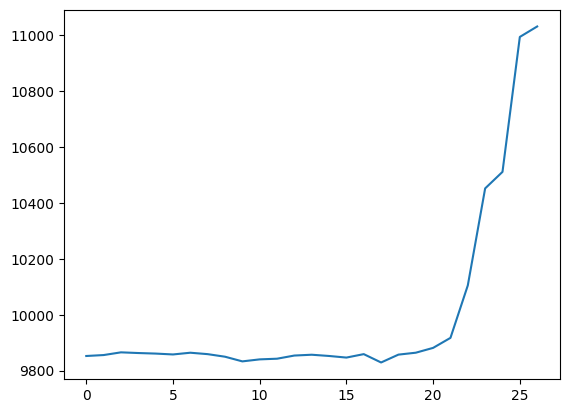

In [ ]:
import matplotlib.pyplot as plt
ys = trainErrorRecord
xs = [x for x in range(len(ys))]
plt.plot(xs, ys)
plt.show()
# Make sure to close the plt object once done
plt.close()

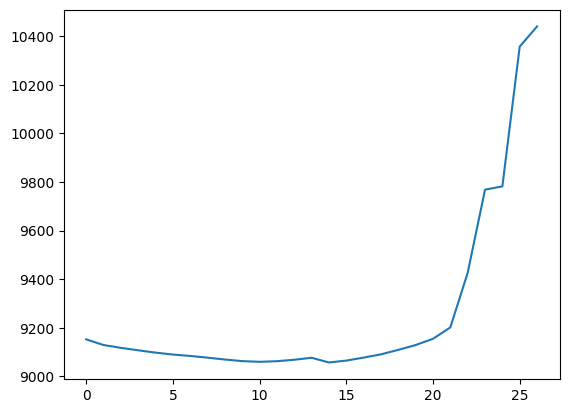

In [ ]:
import matplotlib.pyplot as plt
ys = testErrorRecord
xs = [x for x in range(len(ys))]
plt.plot(xs, ys)
plt.show()
# Make sure to close the plt object once done
plt.close()